<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/NeuralNetworkRegression/BasicRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [421]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [422]:
# lets create some dummy data for learnig
tf.random.set_seed(42)
X = tf.range(start = -100,limit = 50)
X[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([-100,  -99,  -98,  -97,  -96], dtype=int32)>

In [423]:
y = X + 3
y[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([-97, -96, -95, -94, -93], dtype=int32)>

In [424]:
X = tf.expand_dims(X,axis = -1)
y = tf.expand_dims(y, axis = -1)

### Lets visualize the data

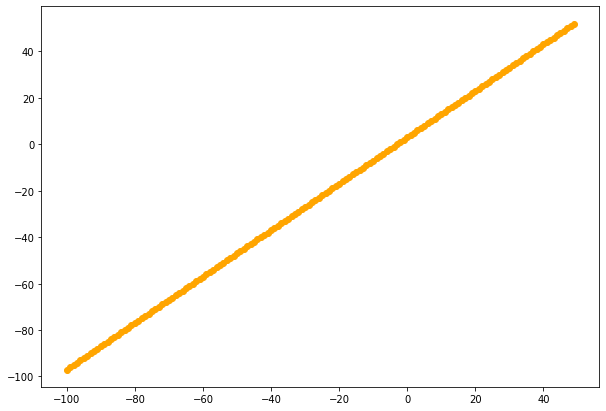

In [425]:
plt.figure(figsize = (10,7))
plt.scatter(X,y, color  = 'orange')
plt.show()

### Lets split the data into train & test : 70 : 30 Ratio

In [426]:
X_train = X[:int(len(X)*0.7)]
y_train = y[:int(len(X)*0.7)]
X_test = X[int(len(X)*0.7):]
y_test = y[int(len(X)*0.7):]

In [427]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

(TensorShape([105, 1]),
 TensorShape([105, 1]),
 TensorShape([45, 1]),
 TensorShape([45, 1]))

### Lets Visualize the train-test data

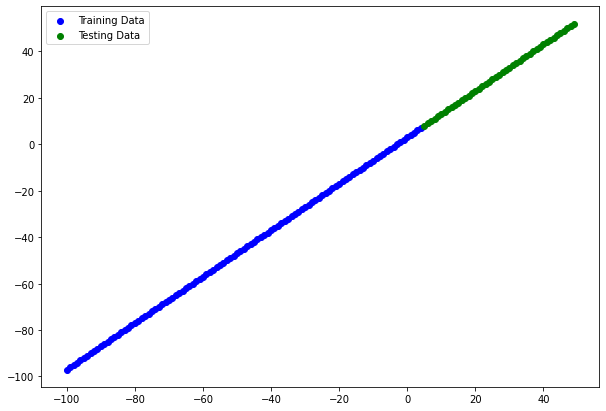

In [428]:
plt.figure(figsize = [10,7])
plt.scatter(X_train,y_train, c = 'b', label = 'Training Data')
plt.scatter(X_test,y_test, c ='g', label = 'Testing Data')
plt.legend()
plt.show()

In [429]:
from tensorflow.keras.utils import plot_model

In [452]:
def model_viz(model):
  print(model.summary(),'\n')
  return plot_model(model=model, show_shapes=True)

In [431]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10,input_shape = [1], name = 'input_layer'),
    tf.keras.layers.Dense(units = 1, name = 'output_layer')
], name = 'model_1')

In [432]:
# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None 



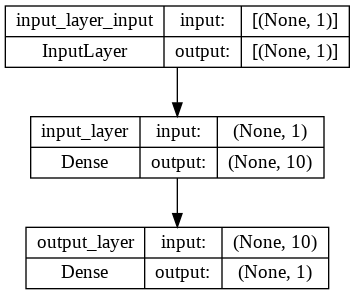

In [453]:
model_viz(model)

In [434]:
# fit the model

model.fit(x = X_train, y = y_train, epochs = 100, verbose = 1)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 36.3271 - mae: 36.3271
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 24.1128 - mae: 24.1128
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 23.1607 - mae: 23.1607
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 19.2644 - mae: 19.2644
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 20.7994 - mae: 20.7994
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 22.2606 - mae: 22.2606
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 24.5645 - mae: 24.5645
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 21.9573 - mae: 21.9573
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 19.1013 - mae: 19.1013
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 23.8486 - mae: 23.8486
Epoch 11/100
4/4 [==============================] - 0s 3ms/

In [435]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [477]:
def pred_viz(
    train_data = X_train,
    train_label = y_train,
    test_data = X_test,
    test_label = y_test,
    y_pred = y_pred):

  plt.figure(figsize = [10,7])
  plt.scatter(train_data,train_label, c = 'b', label = 'Training Data')
  plt.scatter(test_data,test_label, c= 'g', label = 'Testing Data')
  plt.scatter(test_data,y_pred, c='orange', label = 'Prediction')
  plt.legend();

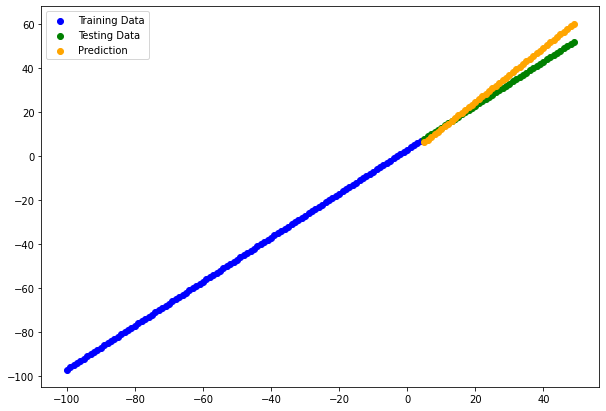

In [455]:
pred_viz()

In [438]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 3.5844 - mae: 3.5844


[3.584439516067505, 3.584439516067505]

In [439]:
y_test.shape, y_pred.shape

(TensorShape([45, 1]), (45, 1))

In [440]:
tf.squeeze(y_test).shape

TensorShape([45])

In [441]:
tf.squeeze(y_pred).shape

TensorShape([45])

In [442]:
# for the metrics to work perfectly, both the parameters have to be in the same shape

tf.metrics.mae(tf.squeeze(y_test),tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.5844398>

In [443]:
tf.metrics.mse(tf.squeeze(y_test),tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=19.228916>

In [450]:
def metrics(y_true = y_test, y_pred = y_pred):
  print('mae : ',tf.metrics.mae(tf.squeeze(y_true),tf.squeeze(y_pred)).numpy())
  print('mse : ',tf.metrics.mse(tf.squeeze(y_true),tf.squeeze(y_pred)).numpy())

In [451]:
metrics()

mae :  3.5844398
mse :  19.228916


Lets try, three different models

**Model1**

In [ ]:
tf.random.set_seed(45)

model1 = tf.keras.Sequential(layers = 
                              [tf.keras.layers.Dense(units = 10),
                               tf.keras.layers.Dense(units =1,name = 'output')],
                              name = 'model1')

model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model1.fit(X_train,y_train, epochs = 100)

In [471]:
y_pred1 = tf.constant(model1.predict(X_test))
y_pred1.shape

2/2 [==============================] - 0s 5ms/step


TensorShape([45, 1])

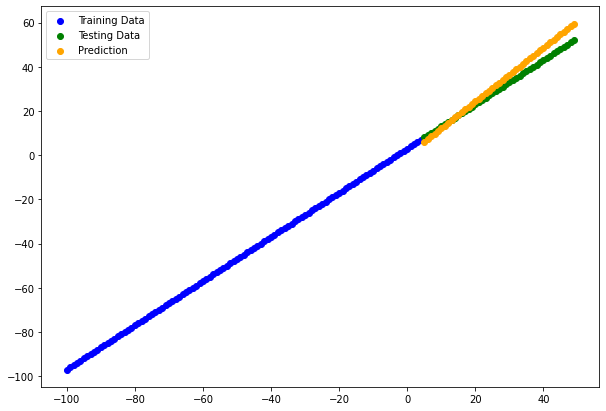

In [478]:
pred_viz(y_pred = y_pred1)

In [479]:
metrics(y_pred = y_pred1)

mae :  3.238507
mse :  15.730488


**Model2**

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential(layers = 
                             [tf.keras.layers.Dense(units = 10),
                              tf.keras.layers.Dense(units =1, name = 'output')],
                             name = 'model2')

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

model2.fit(X_train,y_train, epochs = 500)

In [483]:
y_pred2 = model2.predict(X_test)

2/2 [==============================] - 0s 7ms/step


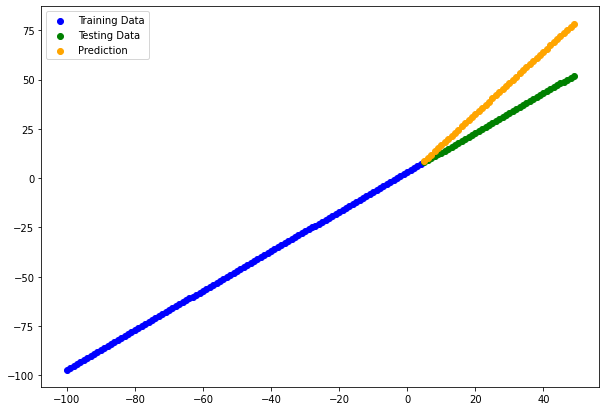

In [487]:
pred_viz(y_pred = y_pred2)

In [488]:
metrics(y_pred = y_pred2)

mae :  13.5920315
mse :  241.65018


**Model3**

In [493]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential( layers = 
                             [tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)],
                             name = 'model3')

In [494]:
model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ['mae'])

In [ ]:
model3.fit(X_train,y_train, epochs = 100)

In [496]:
y_pred3 = model3.predict(X_test)

2/2 [==============================] - 0s 6ms/step


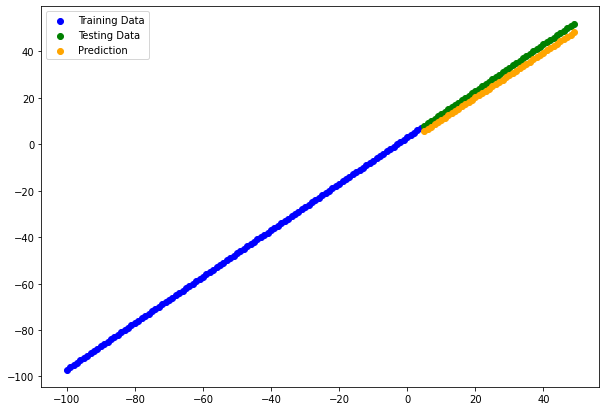

In [497]:
pred_viz(y_pred = y_pred3)

In [498]:
metrics(y_pred = y_pred3)

mae :  3.0642564
mse :  9.57075


**Saving Tensorflow models**

1. Saved Model Format - native to tensor flow with variable and weights stored
2. HDF5 Format (.h5) for universal portabilty of the model

In [500]:
# saving in the SavedModel Foramt

model3.save('best_model_savedmodelformat')

In [501]:
# saving the model in the HDF5 format
model3.save('best_model.h5')

**Load the Model back into the noteboook**

In [502]:
# loading the model from the saved model format
load_model3_1 = tf.keras.models.load_model('/content/best_model_savedmodelformat')

In [507]:
# checking the model prediction

np.mean(load_model3_1.predict(X_test) == model3.predict(X_test)) == 1

2/2 [==============================] - 0s 11ms/step


True

In [504]:
# loading the model from the HDF5 format

load_model_3_2 = tf.keras.models.load_model('/content/best_model.h5')

In [506]:
np.mean(load_model_3_2.predict(X_test) == model3.predict(X_test)) == 1

2/2 [==============================] - 0s 13ms/step


True